## Successful Attempt of Frailty Index
#### By Gavin Qu, July 10th 2024

### Data Extraction
- Reads each wave's data from its respective file
- Extracts only the specified variables for each wave
- Adds a 'wave' column to identify the source wave for each row
- Combines all waves' data into a single DataFrame

In [1]:
import os
import pandas as pd

# Set directory
data_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Base list of relevant variables (without wave prefix)
base_variables = [
    'pidp',
    'age_dv',
    'disdif1', 'disdif2', 'disdif3', 'disdif4', 'disdif5', 'disdif6', 'disdif7', 'disdif8',
    'disdif9', 'disdif10', 'disdif11',
    'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 
    'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 
    'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 
    'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 
    'hcondever1', 'hcondever2', 'hcondever3', 'hcondever4', 'hcondever5', 'hcondever6', 'hcondever7', 'hcondever8', 
    'hcondever9', 'hcondever10', 'hcondever11', 'hcondever12', 'hcondever13', 'hcondever14', 'hcondever15', 'hcondever16', 
    'hcondnew1', 'hcondnew2', 'hcondnew3', 'hcondnew4', 'hcondnew5', 'hcondnew6', 'hcondnew7', 'hcondnew8', 
    'hcondnew9', 'hcondnew10', 'hcondnew11', 'hcondnew12', 'hcondnew13', 'hcondnew14', 'hcondnew15', 'hcondnew16', 
]

# Initialize an empty list to store DataFrames
df_list = []

# Process each wave
for wave in 'abcdefghijklm':
    file_path = os.path.join(data_dir, f'{wave}_indresp.dta')
    
    # Read the .dta file to get available columns
    with pd.read_stata(file_path, iterator=True) as stata_file:
        available_columns = stata_file.variable_labels().keys()
    
    # Create a list of variables that exist in this wave's data
    wave_vars = ['pidp'] + [f'{wave}_{var}' for var in base_variables[1:] if f'{wave}_{var}' in available_columns]
    
    # Read only the available columns
    df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)
    df_wave['wave'] = wave
    
    # Remove wave prefix from column names
    df_wave.columns = ['pidp' if col == 'pidp' else col[2:] if col.startswith(f'{wave}_') else col for col in df_wave.columns]
    
    df_list.append(df_wave)
    print(f"Processed wave {wave}, extracted {len(wave_vars)} variables")

# Combine all DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

# Save to CSV
output_path = os.path.join(output_dir, 'ukhls_extracted.csv')
df_combined.to_csv(output_path, index=False)

print(f"Extracted data saved to {output_path}")
print(f"Total rows: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")

Processed wave a, extracted 29 variables
Processed wave b, extracted 29 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_10794/1236701905.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_10794/1236701905.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave c, extracted 45 variables
Processed wave d, extracted 45 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_10794/1236701905.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_10794/1236701905.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave e, extracted 45 variables
Processed wave f, extracted 45 variables
Processed wave g, extracted 45 variables
Processed wave h, extracted 45 variables
Processed wave i, extracted 45 variables
Processed wave j, extracted 43 variables
Processed wave k, extracted 43 variables
Processed wave l, extracted 43 variables
Processed wave m, extracted 43 variables
Extracted data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_extracted.csv
Total rows: 533476
Total columns: 76


**The resulting csv file from the previous step does not organize the 'pidp' correctly and next to each other, so the following script with reorganize it into a easier to work with long panel with the same 'pidp' all below each other.**

In [2]:
import pandas as pd
import os

# Set input and output directories
input_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Read the input CSV file
input_file = os.path.join(input_dir, 'ukhls_extracted.csv')
df = pd.read_csv(input_file)

# Sort the dataframe by 'pidp' and 'wave'
df_sorted = df.sort_values(['pidp', 'wave'])

# Reset the index
df_sorted = df_sorted.reset_index(drop=True)

# Save the sorted dataframe to a new CSV file
output_file = os.path.join(output_dir, 'ukhls_long_panel_format.csv')
df_sorted.to_csv(output_file, index=False)

print(f"Long panel format data saved to {output_file}")
print(f"Total rows: {len(df_sorted)}")
print(f"Total columns: {len(df_sorted.columns)}")

Long panel format data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv
Total rows: 533476
Total columns: 76


### Data Wrangling and New Variable Construction
#### Creating the 'healthcond' variable

1. For wave 'a', it only considers hcond.
2. It skips wave 'b' for hcond.
3. For waves 'c' through 'i' (waves 2-9), it considers both hcond (for new participants) and hcondn (for existing participants).
4. For wave 'j' (wave 10), it uses hcond and hcondever.
5. For waves 'k', 'l', and 'm' (waves 11-13), it uses hcond and hcondnew.
6. It converts all negative values to NaN.
7. After processing each wave, it forward-fills the health condition status for each individual.

In [3]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv')

# Define waves
waves = 'abcdefghijklm'

def create_health_condition_columns(df):
    for i in range(1, 17):
        condition_col = f'healthcond{i}'
        df[condition_col] = np.nan
        
        for wave in waves:
            if wave == 'a':
                hcond_col = f'{wave}_hcond{i}'
                if hcond_col in df.columns:
                    df.loc[df['wave'] == wave, condition_col] = np.where(df[hcond_col] == 1, 1, 
                                                                         np.where(df[hcond_col] == 0, 0, np.nan))
            elif wave == 'b':
                # Skip wave b for hcond
                continue
            elif wave in 'cdefghij':  # Waves 2-9
                hcond_col = f'{wave}_hcond{i}'
                hcondn_col = f'{wave}_hcondn{i}'
                if hcond_col in df.columns and hcondn_col in df.columns:
                    df.loc[df['wave'] == wave, condition_col] = np.where(
                        (df[hcond_col] == 1) | (df[hcondn_col] == 1), 1,
                        np.where((df[hcond_col] == 0) & (df[hcondn_col] == 0), 0, np.nan)
                    )
            elif wave == 'j':  # Wave 10
                hcond_col = f'{wave}_hcond{i}'
                hcondever_col = f'{wave}_hcondever{i}'
                if hcond_col in df.columns and hcondever_col in df.columns:
                    df.loc[df['wave'] == wave, condition_col] = np.where(
                        (df[hcond_col] == 1) | (df[hcondever_col] == 1), 1,
                        np.where((df[hcond_col] == 0) & (df[hcondever_col] == 0), 0, np.nan)
                    )
            elif wave in 'klm':  # Waves 11-13
                hcond_col = f'{wave}_hcond{i}'
                hcondnew_col = f'{wave}_hcondnew{i}'
                if hcond_col in df.columns and hcondnew_col in df.columns:
                    df.loc[df['wave'] == wave, condition_col] = np.where(
                        (df[hcond_col] == 1) | (df[hcondnew_col] == 1), 1,
                        np.where((df[hcond_col] == 0) & (df[hcondnew_col] == 0), 0, np.nan)
                    )
            
            # Convert negative values to NaN
            for col in [col for col in df.columns if col.endswith(str(i))]:
                df[col] = df[col].where(df[col] >= 0, np.nan)
    
    return df

# Apply the function to create health condition columns
df = create_health_condition_columns(df)

# Sort the dataframe by pidp and wave
df = df.sort_values(['pidp', 'wave'])

# Forward fill the health conditions for each pidp
for i in range(1, 17):
    col = f'healthcond{i}'
    df[col] = df.groupby('pidp')[col].transform(lambda x: x.ffill())

# Save the updated dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv'
df.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Updated dataset saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv
Total rows: 533476
Total columns: 92


### Construction of the Frailty Index

We also assigned a frailty of 1 if that person has died, using a previously extracted dataframe with death and wave data. 

In [6]:
import pandas as pd
import numpy as np

# Load the main dataset
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv')

# Load the death dataset
death_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/extracted_dcsedw_dv_with_deaths.csv')

# Define waves
waves = 'abcdefghijklm'

# Function to calculate frailty
def calculate_frailty(row):
    healthcond_cols = [f'healthcond{i}' for i in range(1, 17)]
    disdif_cols = [f'disdif{i}' for i in range(1, 12)]
    
    relevant_cols = healthcond_cols + disdif_cols
    values = row[relevant_cols]
    
    if values.isna().all():
        return np.nan
    
    count_ones = (values == 1).sum()
    return count_ones / 27

# Calculate initial frailty for each row
df['frailty'] = df.apply(calculate_frailty, axis=1)

# Merge death information
for wave in waves:
    death_col = f'{wave}_death'
    if death_col in death_df.columns:
        df = df.merge(death_df[['pidp', death_col]], on='pidp', how='left')

# Update frailty based on death
df = df.sort_values(['pidp', 'wave'])
cumulative_death = df.groupby('pidp')[[f'{w}_death' for w in waves if f'{w}_death' in df.columns]].cumsum()
df['is_dead'] = (cumulative_death.sum(axis=1) > 0).astype(int)

# Update frailty to 1 for all waves after and including death
df['frailty'] = np.where(df['is_dead'] == 1, 1, df['frailty'])

# Save the result
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv'
df.to_csv(output_path, index=False)

print(f"Data with frailty measures saved to {output_path}")

# Quick summary of frailty measure
frailty_summary = df['frailty'].describe()
print("\nFrailty Summary:")
print(frailty_summary)


Data with frailty measures saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv

Frailty Summary:
count    311358.000000
mean          0.100782
std           0.256628
min           0.000000
25%           0.000000
50%           0.000000
75%           0.074074
max           1.000000
Name: frailty, dtype: float64


### Plot of Frailty from age 20 and above
We want a smoothed line of best fit rather than a percentile representation. We can use a **LOWESS** (Locally Weighted Scatterplot Smoothing) approach to achieve this.

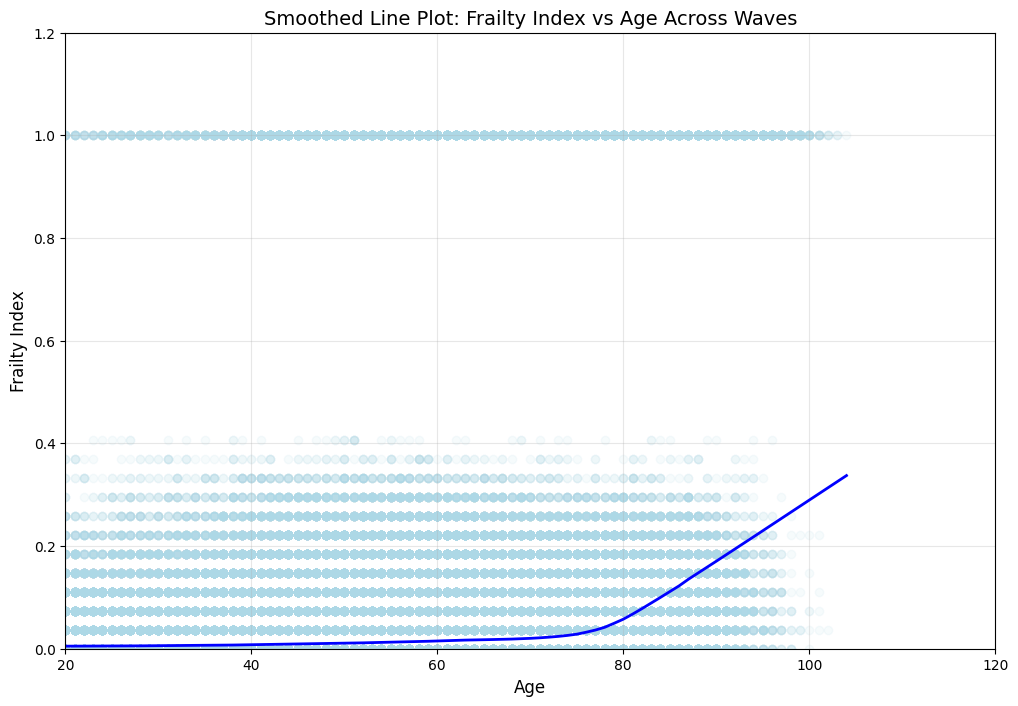

Plot displayed

Summary Statistics:
count    298366.000000
mean          0.104419
std           0.261008
min           0.000000
25%           0.000000
50%           0.000000
75%           0.074074
max           1.000000
Name: frailty, dtype: float64

Number of observations used in the plot: 298366

Number of observations with frailty score 1: 22397

Age range:
count    298366.000000
mean         54.046708
std          17.570502
min          20.000000
25%          41.000000
50%          55.000000
75%          68.000000
max         104.000000
Name: age_dv, dtype: float64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv')

# Filter out NaN frailty scores, and ages below 20 or above 120
df_filtered = df[(df['frailty'] >= 0) & 
                 (df['frailty'].notna()) & 
                 (df['age_dv'] >= 20) & 
                 (df['age_dv'] <= 120)]

# Perform LOWESS smoothing
smoothed = lowess(df_filtered['frailty'], df_filtered['age_dv'], frac=0.15)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['age_dv'], df_filtered['frailty'], alpha=0.1, color='lightblue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='blue', linewidth=2)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frailty Index', fontsize=12)
plt.title('Smoothed Line Plot: Frailty Index vs Age Across Waves', fontsize=14)
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(20, 120)
plt.ylim(0, 1.2)

# Show the plot
plt.show()

print("Plot displayed")

# Print some summary statistics
print("\nSummary Statistics:")
print(df_filtered['frailty'].describe())
print("\nNumber of observations used in the plot:", len(df_filtered))
print("\nNumber of observations with frailty score 1:", (df_filtered['frailty'] == 1).sum())
print("\nAge range:")
print(df_filtered['age_dv'].describe())